# Assignment:Gramener Case Study

In [1]:
import numpy as np
import pandas 
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

sns.set(style="ticks", color_codes=True)


The warnings filter controls whether warnings should be ignored, displayed, or turned into errors (raising an exception)

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Understanding about the given dataset

Description - The data given contains the information about past loan applicants and whether they ‘defaulted’ or not This dataset consists of 111 attributes/columns This dataset consists of 39717 rows

The company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures.

The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

The company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.

As per the info given, the customers labelled as 'charged-off' are the 'defaulters'.

# Reading, Inspection & Cleaning

Import and read the database. Store it in a variable called loan.

In [3]:
loan=pandas.read_csv(r"C:/Users/Ranja/loan.csv", encoding = "ISO-8859-1")
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


# Inspect Null values

Data sets, most of the times end up with lot of invalid, corrupt, or missing values.
This later creates problems while operating that data frame.

While making a Data Frame from a csv file, many blank columns are imported as null value into the Data Frame. 
Here we are inspecting the Nulls so that they can be handled.

In [4]:
loan.isnull().sum(axis=1)

0        58
1        57
2        59
3        56
4        55
5        58
6        57
7        57
8        58
9        57
10       57
11       58
12       57
13       57
14       58
15       58
16       57
17       57
18       56
19       58
20       57
21       57
22       57
23       58
24       58
25       58
26       58
27       56
28       57
29       57
         ..
39687    59
39688    61
39689    59
39690    59
39691    59
39692    60
39693    59
39694    59
39695    59
39696    59
39697    59
39698    59
39699    59
39700    60
39701    59
39702    59
39703    59
39704    60
39705    59
39706    60
39707    59
39708    59
39709    60
39710    60
39711    59
39712    59
39713    59
39714    61
39715    61
39716    59
Length: 39717, dtype: int64

In [5]:
round(100*(loan.isnull().sum()/len(loan.index)),2)

id                                  0.00
member_id                           0.00
loan_amnt                           0.00
funded_amnt                         0.00
funded_amnt_inv                     0.00
term                                0.00
int_rate                            0.00
installment                         0.00
grade                               0.00
sub_grade                           0.00
emp_title                           6.19
emp_length                          2.71
home_ownership                      0.00
annual_inc                          0.00
verification_status                 0.00
issue_d                             0.00
loan_status                         0.00
pymnt_plan                          0.00
url                                 0.00
desc                               32.58
purpose                             0.00
title                               0.03
zip_code                            0.00
addr_state                          0.00
dti             

# Drop unecessary columns

It is important to be able to deal with large amount of data, which may contain missing values, 
inconsistent formatting, malformed records, or nonsensical outliers.
Cleaning datasets and getting it down to workable format is an important step in the analysis

We found that not all the categories of the given data in a dataset are useful for analysis.
Many columnns contain over 100% Nulls which are not adding value to the analaysis

Distilling the data down & retaining the coulmns that will help in meaningful analysis 

In [9]:
loan.drop(loan.columns[loan.isnull().mean() > 0.15], axis = 1, inplace = True)

In [11]:
loan.drop(["member_id"], axis = 1, inplace = True)

In [12]:
loan.shape

(39717, 52)

# Inspecting the distributions of some important columns

This is done to plan on handling the given categorical data.

We decided to create the subsets of the data remained after cleansing and work on these subsets.

In [13]:
loan.groupby('term').size()/len(loan.index)*100

term
 36 months    73.258302
 60 months    26.741698
dtype: float64

In [14]:
loan.groupby('home_ownership').size()/len(loan.index)*100

home_ownership
MORTGAGE    44.462069
NONE         0.007553
OTHER        0.246746
OWN          7.699474
RENT        47.584158
dtype: float64

In [15]:
loan.groupby('loan_status').size()/len(loan.index)*100

loan_status
Charged Off    14.167737
Current         2.870307
Fully Paid     82.961956
dtype: float64

In [16]:
loan.groupby('grade').size()/len(loan.index)*100

grade
A    25.392149
B    30.264119
C    20.389254
D    13.362036
E     7.155626
F     2.641186
G     0.795629
dtype: float64

In [17]:
loan.groupby('verification_status').size()/len(loan.index)*100

verification_status
Not Verified       42.603923
Source Verified    25.145404
Verified           32.250674
dtype: float64

In [18]:
loan.groupby('purpose').size()/len(loan.index)*100

purpose
car                    3.900093
credit_card           12.916383
debt_consolidation    46.934562
educational            0.818289
home_improvement       7.493013
house                  0.959287
major_purchase         5.506458
medical                1.744845
moving                 1.467885
other                 10.053629
renewable_energy       0.259335
small_business         4.602563
vacation               0.959287
wedding                2.384369
dtype: float64

In [19]:
loan.groupby('addr_state').size()/len(loan.index)*100

addr_state
AK     0.201425
AL     1.138052
AR     0.616864
AZ     2.213158
CA    17.873958
CO     1.994108
CT     1.890878
DC     0.538812
DE     0.287031
FL     7.216054
GA     3.519903
HI     0.438100
IA     0.012589
ID     0.015107
IL     3.839666
IN     0.022660
KS     0.682327
KY     0.818289
LA     1.097767
MA     3.373870
MD     2.641186
ME     0.007553
MI     1.812826
MN     1.548455
MO     1.727220
MS     0.047838
MT     0.214014
NC     1.984037
NE     0.012589
NH     0.430546
NJ     4.657955
NM     0.475867
NV     1.251353
NY     9.597905
OH     3.079286
OK     0.752826
OR     1.135534
PA     3.819523
RI     0.498527
SC     1.188408
SD     0.161140
TN     0.042803
TX     6.866077
UT     0.649596
VA     3.542564
VT     0.135962
WA     2.114963
WI     1.158194
WV     0.445653
WY     0.208979
dtype: float64

### Crosschecking the Excel sheet after data cleaning

In [20]:
loan.to_csv(r"C:\Users\Ranja\Downloads\loan_Check1.csv",sep='\t', encoding='utf-8')

In [21]:
# subsetting the columns required for analysis
analysis_columns = ["loan_status","purpose", "funded_amnt", "total_rec_prncp", "home_ownership", "term",
                "installment", "dti", "recoveries", "int_rate", "addr_state", "id"]
loans_final = loan.loc[:, analysis_columns].copy()

Each of the sections below will be reserved for the analysis of one particular variable. The section titles will indicate which variable is being analyzed.

# Interest Rate

The general conclusion is that higher a loan's interest rate, greater the number of defaulters. Is this true for the current dataset? Are there statistically significant differences among the interest rates of loans on which the borrowers did and did not default?

Answering these questions is going to be the aim of this section.

First off, there's a problem with working on the interest rates as they are. The numerical value of the interest rates is followed by the "%" symbol. It's better to remove that, convert interest rate to a numeric var and analyze it.

In [22]:
# converting loans_final.int_rate to float32
loans_final["int_rate"] = loans_final["int_rate"].str.replace("%", "")
loans_final["int_rate"] = loans_final["int_rate"].astype("float32")

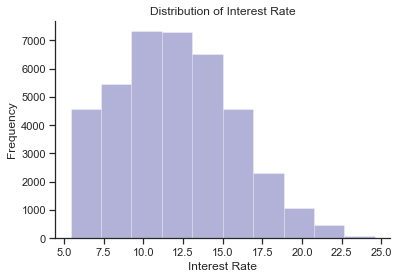

In [23]:
# distribution of interest rate
plt.hist(loans_final["int_rate"], alpha = 0.3, color = "navy")
plt.title("Distribution of Interest Rate")
plt.xlabel("Interest Rate")
plt.ylabel("Frequency")
sns.despine()
plt.show()

The distribution of interest rate for the loans that were charged off seem to follow a normal distribution. It'd be a good action to test that observation as it would help a lot during the modeling / hypothesis testing stage.

In [24]:
### function to get cdf of the variable
def evalCdf(ts, x):
    count = 0
    for t in ts:
        if x > t:
            count += 1
    return count /  len(ts)

In [25]:
data = loans_final["int_rate"]
data_cdf = data.apply(lambda x: evalCdf(data, x = x))

model = np.random.normal(loc = data.mean(), scale = data.std(), size = data.shape[0])
model_cdf = [evalCdf(ts = model, x = i) for i in model]

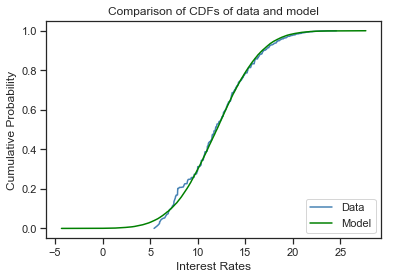

In [26]:
# a plot comparing the cdfs of the data and the model
plt.plot(sorted(data), sorted(data_cdf), color = 'steelblue', label = "Data")
plt.plot(sorted(model), sorted(model_cdf), color = "green", label = "Model")
plt.legend(loc = "lower right")
plt.title("Comparison of CDFs of data and model")
plt.xlabel("Interest Rates")
plt.ylabel("Cumulative Probability")
plt.show()

This is approximately normal. The plot shows that the normal distribution approximates the data well to a certain extent. But, the lower tail of the data deviate from the analytic distribution significantly. However, this data would still provide agreeable and approximately correct results when subjected to tests that expect the input data to follow a normal distribution.

What about the distributions of interest rate segmented by loan status?

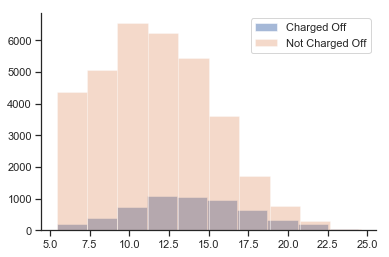

In [27]:
#
plt.hist(loans_final["int_rate"][loans_final.loan_status == "Charged Off"], label = "Charged Off", alpha = 0.5)
plt.hist(loans_final["int_rate"][loans_final.loan_status != "Charged Off"], label = "Not Charged Off", alpha = 0.3)
plt.legend()
sns.despine()
plt.show()

This graph shows that the data follow the normal distribution to a good extent. Though the deviation seems to be greater near the lower tails. But, this can be ignored to a certain extent and some hypothesis tests which expect the data to be normally distributed can be safely carried out on the interest rates.

Another hypothesis that can be tested is whether loans that defaulted have higher interest rates than loans that didn't. A T-test can be safely carried out. But, a more interesting option is a permutation test.

Since the permutation test does not make any assumptions about how the data are distributed, it can used safely (to a certain extent).

The hypothesis to test here would be:

$$H_o: \mu_{Charged Off} = \mu_{Not Charged Off}$$
That is,

$$H_o: \mu_{Charged Off} - \mu_{Not Charged Off} = 0$$
The research hypothesis would be:

$$H_a: \mu_{Charged Off} \neq \mu_{Not Charged Off}$$
That is,

$$H_a: \mu_{Charged Off} - \mu_{Not Charged Off} \neq 0$$
Testing this hypothesis at a 5% significance level would give us a good idea of the difference in the data.

In [28]:
# function to find out mean difference
def meanDiff(x, n1, n2):
    n = n1 + n2
    total = np.arange(n)
    indices1 = np.random.choice(n, n1, replace = False)
    indices2 = total[~np.isin(total, indices1)]
    
    mean_diff = x[indices1].mean() - x[indices2].mean()
    return mean_diff

# a function to carry out a permutation test
def permutationTest(x, n1, n2, times= 1000):
    differences = []
    print("Carrying out the permutation test {0} times...".format(times))
    for i in list(range(times)):
        difference = meanDiff(x, n1, n2)
        differences.append(difference)
    
    return differences

In [29]:
# carrying out a permutation test on the interest rates
interest_test_results = permutationTest(x = loans_final["int_rate"], n1 = 5627, n2 = 34090, times = 1000)

Carrying out the permutation test 1000 times...


In [30]:
# finding the actual difference in means
actual_difference = loans_final["int_rate"][loans_final.loan_status == "Charged Off"].mean() - \
loans_final["int_rate"][loans_final.loan_status != "Charged Off"].mean()

Now that both the actual difference and the difference of the permutation test carried out 1000 times, the p-value associated with the test can be calculated.

In [31]:
# p-value associated with the test
sum([i > 0 for i in interest_test_results]) / 1000

0.504

A plot of the distributions of the difference between sample means paints a better picture.

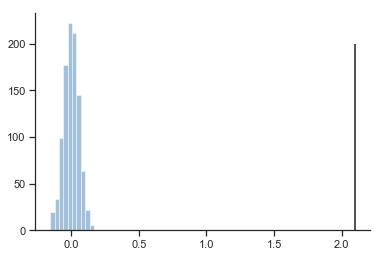

In [32]:
plt.hist(interest_test_results, alpha = 0.5, color = "steelblue")
plt.vlines(x = actual_difference, ymin = 0, ymax = 200)
sns.despine()
plt.show()

The actual difference lies well outside the calculated differences. Thus, we have enough evidence to reject the null hypothesis that the difference between the means is equal to zero.

# Interest Rate: Results

Here are the results of the analysis of interest rate segmented over loan status.

1. The distribution of the status of the loan is approximately normal. Thus, hypothesis tests that expect the data to be normally distributed would provide good results.
2. The difference between the means of interest rates of the loans that did and didn't default is statistically significant. This means that the loans that have defaulted on average have interest rates that are different from loans that didn't default. This information can drive a lot of decisions and could lead to the development of better models.

# Terms of the Loan and Debt-to-income ratio

The next columns of interest would be debt-to-income ratio and term of the loan. The debt-to-income ratio is used by a lot of banks to determine if an applicant has the capaicity to repay a loan. Logically, this would make it a column worth analyzing.

The term of the loan, directly does not provide us with much information. However, it still does give us information which can be used in some other way.

# Term of the loan

Debt-to-income ratio
The dti of is the ratio of the amount of debt a person has to payout in a specified time period to the income they have in the same time period. Usually, the time period is a month.

dti is an indicator of how able the individual is to repay a loan. Higher values of dti indicate that the person has more debt for his income level. It can be thought of as a standardized measure of the amount of debt a person has.

A good way to start an exploratory analysis of this variable would be look at it's distribution

# Debt-to-income ratio

The dti of is the ratio of the amount of debt a person has to payout in a specified time period to the income they have in the same time period. Usually, the time period is a month.

dti is an indicator of how able the individual is to repay a loan. Higher values of dti indicate that the person has more debt for his income level. It can be thought of as a standardized measure of the amount of debt a person has.

A good way to start an exploratory analysis of this variable would be look at it's distribution

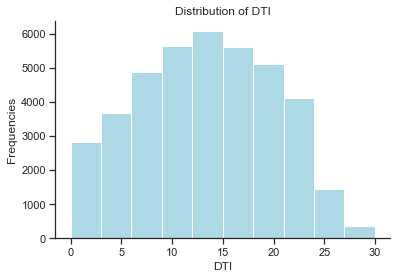

In [34]:
# distribution of dti
plt.hist(loans_final["dti"], color = "lightblue")
plt.title("Distribution of DTI")
plt.xlabel("DTI")
plt.ylabel("Frequencies")
sns.despine()
plt.show()

This seems to have a shape similar to interest rate. So, this might produce a graph that is similar to the one produced by interest rate. So, it's better to move onto the finer details of the segmented analysis.

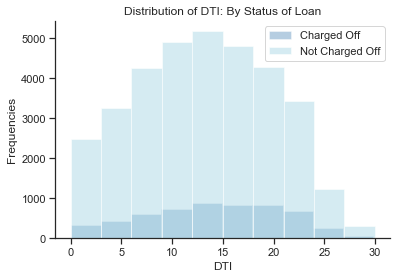

In [35]:
# plot of distributions of dit by loan status
plt.hist(loans_final["dti"][loans_final.loan_status == "Charged Off"], color = "steelblue", 
         label = "Charged Off", alpha = 0.4)
plt.hist(loans_final["dti"][loans_final.loan_status != "Charged Off"], color = "lightblue", 
         label = "Not Charged Off", alpha = 0.5)
plt.title("Distribution of DTI: By Status of Loan")
plt.xlabel("DTI")
plt.ylabel("Frequencies")
plt.legend(loc = "upper right")
sns.despine()
plt.show()

Again, the same question could be asked of dti too? Are the differences statistically significant? A permutation test can be carried. Since a way to do it has already be defined, it's better to check it out...

In [40]:
# permutation test for dti
dti_test_results = permutationTest(x = loans_final["dti"], n1 = 5627, n2 = 34090)

Carrying out the permutation test 1000 times...


In [41]:
actual_diff_dti = loans_final["dti"][loans_final.loan_status == "Charged Off"].mean() - loans_final["dti"][loans_final.loan_status != "Charged Off"].mean()

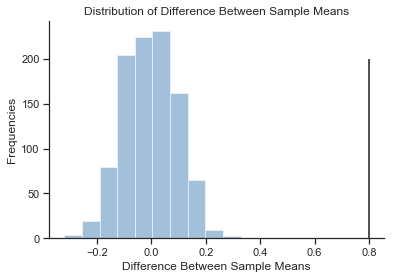

In [42]:
plt.hist(dti_test_results, alpha = 0.5, color = "steelblue")
plt.title("Distribution of Difference Between Sample Means")
plt.xlabel("Difference Between Sample Means")
plt.ylabel("Frequencies")
sns.despine()
plt.vlines(actual_diff_dti, ymin = 0, ymax = 200)

The actual difference lies well outside the calculated difference assuming that the null hypothesis is true. Thus, it's reasonable to conclude that a difference in means of dti does exist for loans that did default and that didn't default.

# Delinquency of Accounts

Delinquency of accounts is a great variable that can be used to determine if an account will default or not. Sadly, the column contains a lot of missing values. And filling those missing values for performing an exploratory analysis might bias our test statistics or the graphs itself. Therefore, even though the column is a potential goldmine, it's pretty useless.

However, this is one place where we can leverage the power of derived metrics. Is there a way to derive the account delinquency from existing variables? The answer is yes. That is, with reasonable assumptions, a variable similar to account delinquency can be derived from the existing data.

# Terms Ratio

Define terms ratio as the ratio of the number of missed term payments to the total number of terms of the loan.

$$Terms\ Ratio = \frac{Missed\ Term\ Payments}{Total\ Terms}$$
Missed term payments can be calculated from two other variables: The amount remaining in the loan and the installment of the loan. Again, the amount remaining can be calculated as the difference between the funded amount and the recoveries and the total principal recieved.

$$Missed\ Term\ Payments = \frac{Amount\ Remaining}{Installment}$$
$$Amount\ Remaining = Funded\ Amount - Recoveries - Total\ Principal\ Recieved\ till\ date$$
Thus, $$ Terms\ Ratio = \frac{Funded\ Amount - Recoveries - Total\ Principal\ Recieved\ till\ date}{Installment * Total Terms}$$

Based on this formula, terms ratio can be derived. From the definition of terms ratio, it is clear that:

1. A high value of terms ratio cannot be a good sign
2. A value of 1 indicates that every payment has been missed (a defaulted loan)
3. A value of 0 indicates that no payments are remaining (a fully paid loan)
By looking at the distribution of terms ratio across loan status, it might be possible to derive some new insight about the data.

#### Assumptions made while defining terms ratio:

1. The loan amounts all have a constant interest installment amortization schedule.
2. A negative terms ratio indicates that the amount recovered was greater than the amount funded. This will be treated as a fully paid loan.
3. A terms ratio greater than one is not possible and cannot exist.

In [43]:
# creating the new column terms ratio
## converting term to integer
loans_final["term"] = loans_final["term"].str.extract(r"([0-9][0-9]).*").astype("int16")

## creating terms_ratio
loans_final["terms_ratio"] = (loans_final["funded_amnt"] - loans_final["recoveries"] - loans_final["total_rec_prncp"]) / \
(loans_final["installment"] * loans_final["term"])

In [44]:
# replacing all the negatives in terms_ratio with 0
loans_final.loc[loans_final.terms_ratio < 0, "terms_ratio"] = 0

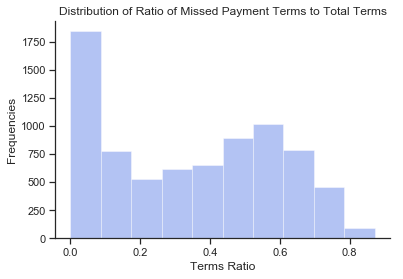

In [45]:
# distribution of terms ratio
# not including 0 since we are not interested in the 0's themselves.
plt.hist(loans_final["terms_ratio"][loans_final.terms_ratio != 0], color = "royalblue", alpha = 0.4)
plt.title("Distribution of Ratio of Missed Payment Terms to Total Terms")
plt.xlabel("Terms Ratio")
plt.ylabel("Frequencies")
sns.despine()
plt.show()

The terms ratio seems to follow an exponential distribution. Thus, it's better to plot the terms ratio as a box plot to get an idea of what the distribution actually looks like.

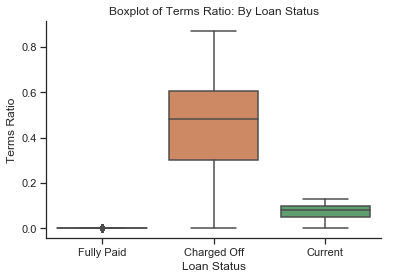

In [46]:
# boxplot of terms ratio over loan status
sns.boxplot(x = "loan_status", y = "terms_ratio", data = loans_final)
plt.title("Boxplot of Terms Ratio: By Loan Status")
plt.xlabel("Loan Status")
plt.ylabel("Terms Ratio")
sns.despine()
plt.show()

The boxplot shown above gives us enough information about how terms_ratio varies by loan status. That is, if a person's terms ratio is above a certain value, then there's a good chance that the person is going to default.

# Terms_Ratio and DTI

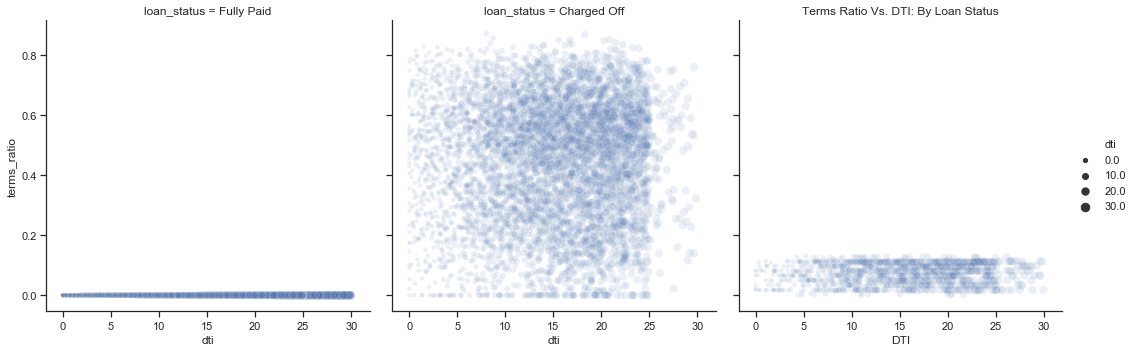

In [47]:
sns.relplot(x = "dti", y = "terms_ratio", col = "loan_status", size = "dti", 
            data = loans_final, kind = "scatter", alpha = 0.1)
plt.title("Terms Ratio Vs. DTI: By Loan Status")
plt.xlabel("DTI")
plt.ylabel("Terms Ratio")
plt.show()

Those mass of points don't reveal a lot of information. But, we can see clearly, patterns in the data. In general for people who had high number of missed term payments were likely to have a high debt to income ratio too.But, the correlation doesn't seem to be too strong. The number might provide justification to this statement.

In [48]:
loans_final["dti"].corr(loans_final["terms_ratio"])

0.04117449004301513

A correlation of only 0.04. That's not a lot. But, it does showcase a weak positive relationship. But, this might not amount to anything. So, any strong conclusions cannot be drawn about the relationship between the number of missed term payments and dti.

###  Creating Simple countplots

	Here we are trying to see from the given data set the impact of home ownership on the distribution of loan grades.

	In general, in the banking sector there is a strong correlation between the home ownership and the grading of the loan given to the customer by the bank.


	The home ownership status is a strong indictor of the ability of the customer to repay the amount owed to the bank.


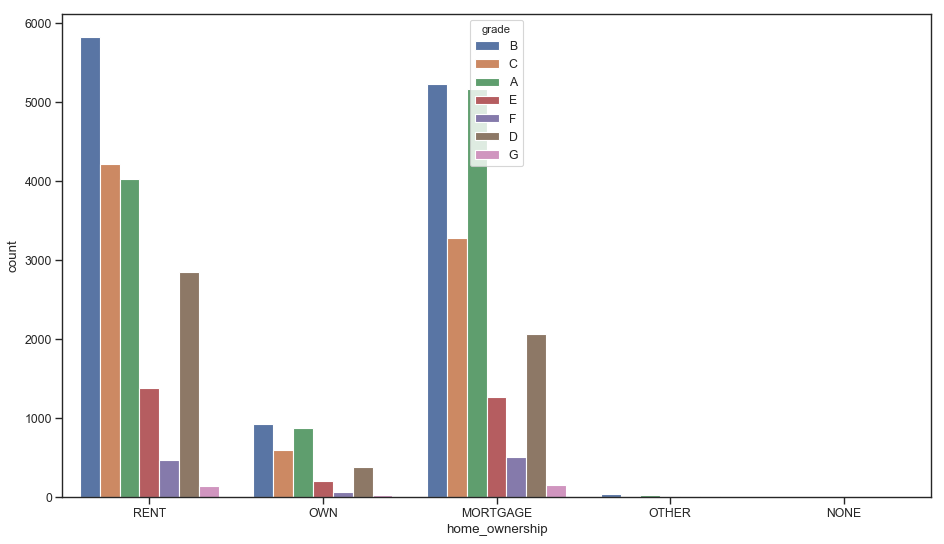

In [49]:
plt.figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
sns.countplot(x = "home_ownership", hue = "grade", data = loan)

Obeservation: Most loans of grade B are given to customers staying in a rented house
followed by customers owning a property.

Loans of grade A are given to customers with Mortgage, followed by customers staying in a rented house

	Here we are trying to see from the given data set the impact of loan status on the distribution of loan grades.

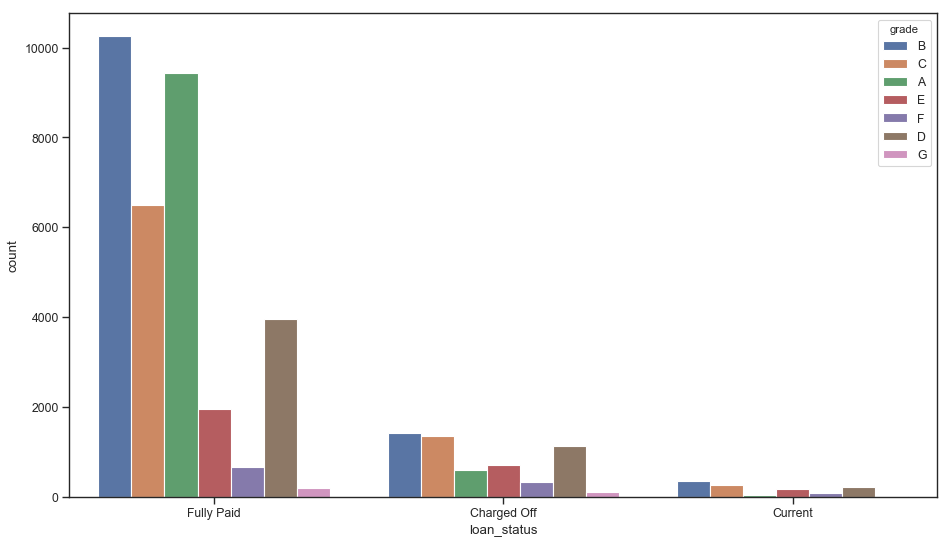

In [50]:
plt.figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
sns.countplot(x = "loan_status", hue = "grade", data = loan)

Obeservation: Most loans of grade B are charged off/'Defaulters' followed by grade C

Grade D has higher charged off/'Defaulters' than grade E

Grades A, F & G show the lower number of charged off/'Defaulters'


	Here we are trying to see from the given data set the impact of loan status on the distribution of home ownership.

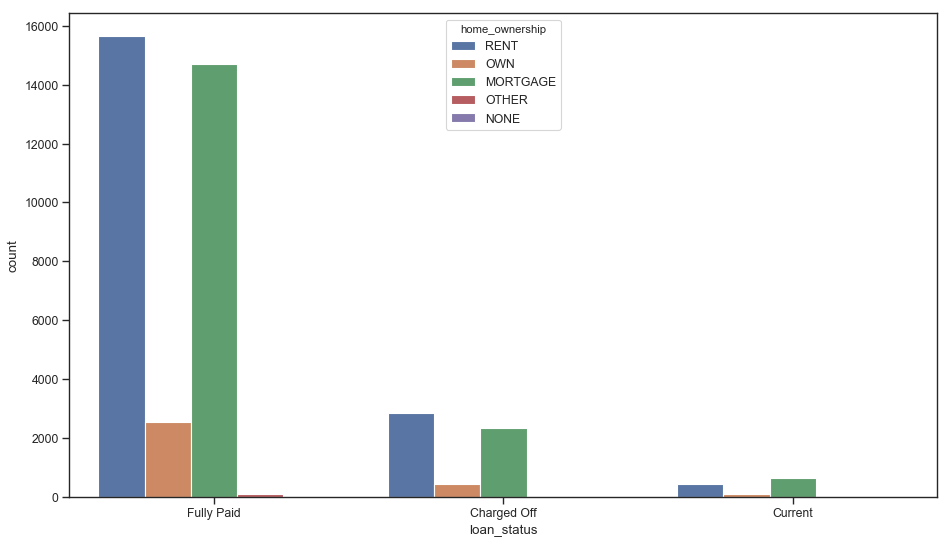

In [51]:
plt.figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
sns.countplot(x = "loan_status", hue = "home_ownership", data = loan)

Obeservation: Most loans of customers staying in a rented house are charged off/'Defaulters'

followed by customers having a mortgage property

	Here we are trying to see from the given data set the impact of loan status on the distribution 
of purpose for which loan has been taken from the bank.

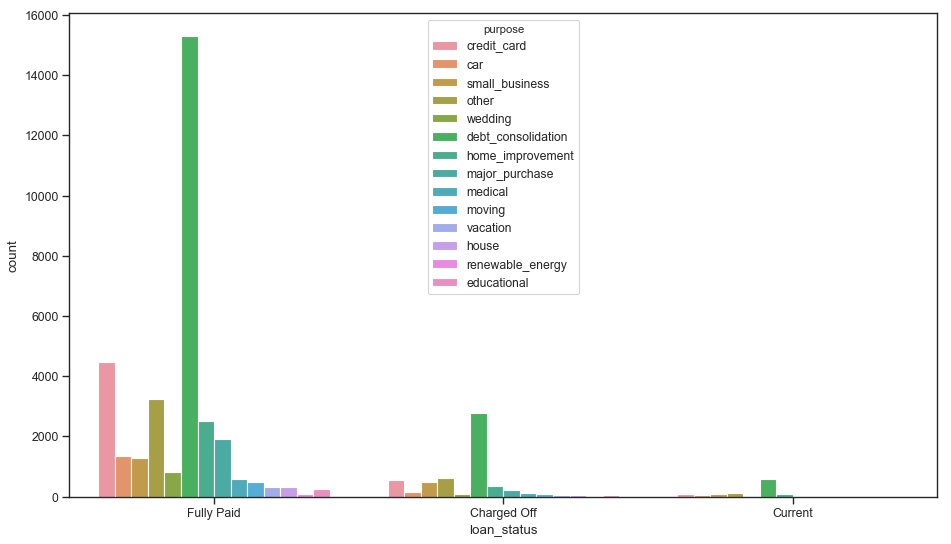

In [52]:
plt.figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
sns.countplot(x = "loan_status", hue = "purpose", data = loan)

Obeservation: Most loans of customers under charged off/'Defaulters' are for debt consolidation

Followed by Credit card, other & home improvement customers are under charged off/'Defaulters'

# Bucketing helps in performing operations easily for univariate, bivariate analysis 

	The data set contains lot of information’s in indiviual columns which is in numeric forms.

	This information consists of a wide spectrum/range of data.

	This makes is essential to segment/bucket the numeric data in different slots of a specific 
range.

	This was done to get better insights of segmented univariate, bivariate analysis.


### Bucketing the annual salary 

We are segmenting the annual salary column with if-else condition &  lambda function

In [53]:
def salary_bracket(x):
    'Dividing the salary into following categories'
    if x < 300001:
        return "Bracket_1"
    elif 300001 <= x < 400001:
        return "Bracket_2"    
    elif 400001 <= x < 600001:
        return "Bracket_3"    
    elif 600001 <= x < 800001:
        return "Bracket_4"
    elif 800001 <= x < 1000001:
        return "Bracket_5"
    else:
        return "Bracket_6"

In [54]:
loan['Annual_Sal'] = loan.annual_inc.apply(lambda x: salary_bracket(x))

In [55]:
loan.Annual_Sal.value_counts()

Bracket_1    39542
Bracket_2       83
Bracket_3       43
Bracket_4       27
Bracket_6       14
Bracket_5        8
Name: Annual_Sal, dtype: int64

	Here we are trying to see the impact of annual salary segments of on the distribution of loan amounts. 

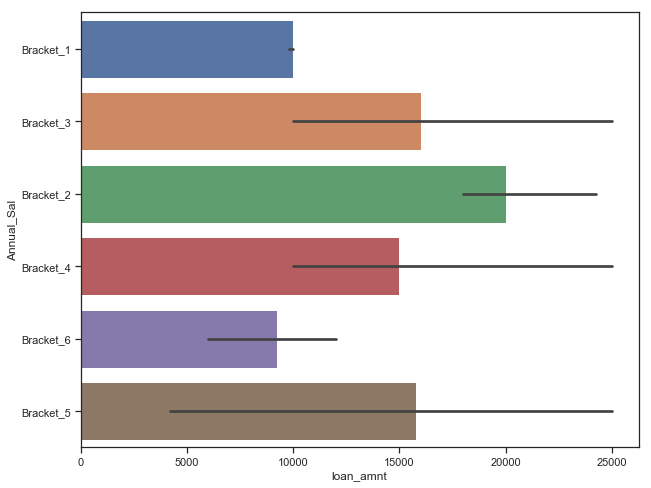

In [56]:
plt.figure(figsize=(10, 8))
sns.barplot(x='loan_amnt', y="Annual_Sal", data=loan, estimator=np.median)
plt.show()

Obeservation: Most loans of customers under bracket 2 have higher loan amount

Followed by customers under bracket 3 of annual income. 

	Here we are trying to see the impact of annual salary segments of on the distribution of loan amounts along with the home ownership status of the customers. 

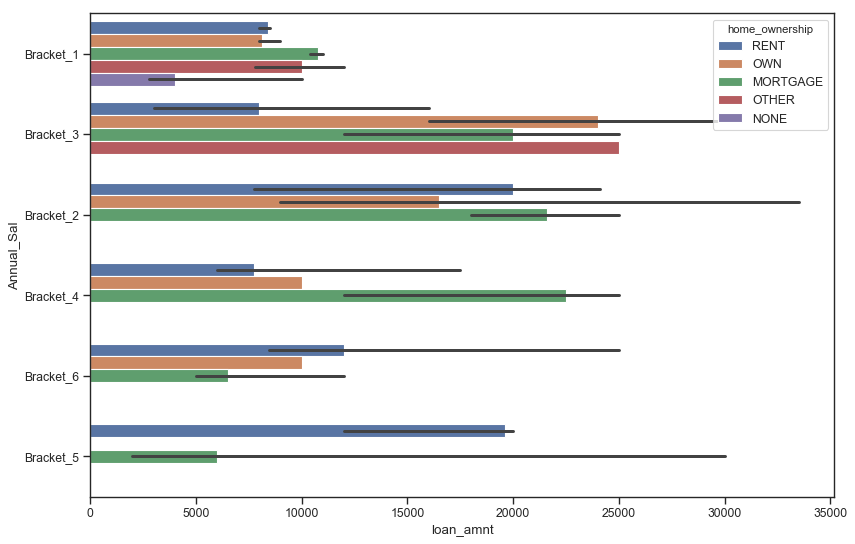

In [58]:
# set figure size for larger figure
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

# specify hue="categorical_variable"
sns.barplot(x='loan_amnt', y='Annual_Sal', hue="home_ownership", data=loan, estimator=np.median)
plt.show()

Obeservation: Most loans of customers under bracket 3 stay in own property

Followed by customers under bracket 3 with Other as the home stauts

	Here we are trying to see the impact of annual salary segments of on the distribution of loan amounts along with the loan status of the customers. 

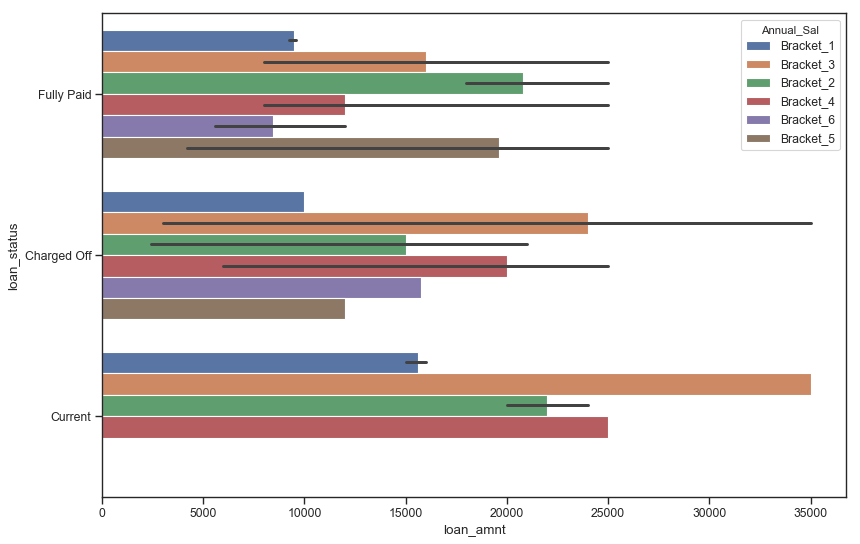

In [59]:
# set figure size for larger figure
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

# specify hue="categorical_variable"
sns.barplot(x='loan_amnt', y='loan_status', hue="Annual_Sal", data=loan, estimator=np.median)
plt.show()

Obeservation: Most loans of customers under bracket 3 show status as 'charged-off' / 'defaulters'

Followed by customers under bracket 4

### Bucketing the loan amount 

We are segmenting the loan amount column with if-else condition &  lambda function

In [60]:
def Loan_amt_bracket(x):
    'Dividing the loan amount into following categories'
    if x < 5001:
        return "Loan_Bracket_1"
    elif 5001 <= x < 10001:
        return "Loan_Bracket_2"    
    elif 10001 <= x < 15001:
        return "Loan_Bracket_3"    
    elif 15001 <= x < 20001:
        return "Loan_Bracket_4"
    elif 20001 <= x < 30001:
        return "Loan_Bracket_5"
    else:
        return "Loan_racket_6"

In [61]:
loan['Loan_amt_bracket'] = loan.loan_amnt.apply(lambda x: Loan_amt_bracket(x))

In [62]:
loan.Loan_amt_bracket.value_counts()

Loan_Bracket_2    12960
Loan_Bracket_1     9568
Loan_Bracket_3     7986
Loan_Bracket_4     4591
Loan_Bracket_5     3784
Loan_racket_6       828
Name: Loan_amt_bracket, dtype: int64

	Here we are trying to see the impact of loan amount segments on the distribution of loan amounts. 

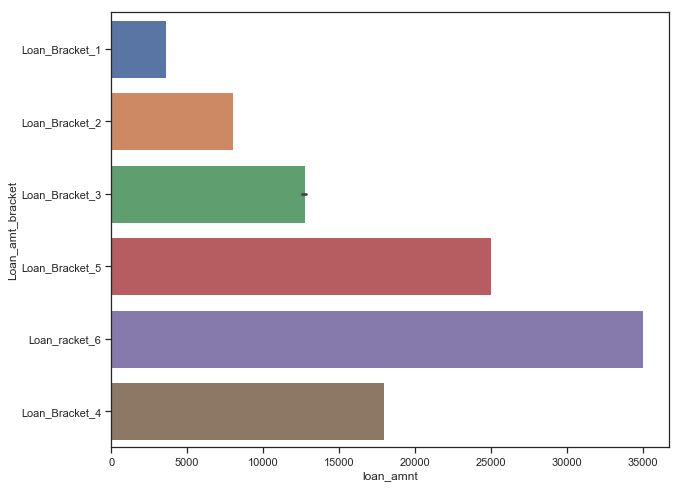

In [63]:
plt.figure(figsize=(10, 8))
sns.barplot(x='loan_amnt', y="Loan_amt_bracket", data=loan, estimator=np.median)
plt.show()

Here we are trying to see the impact of loan amount segments of on the distribution of loan amounts along with loan status.

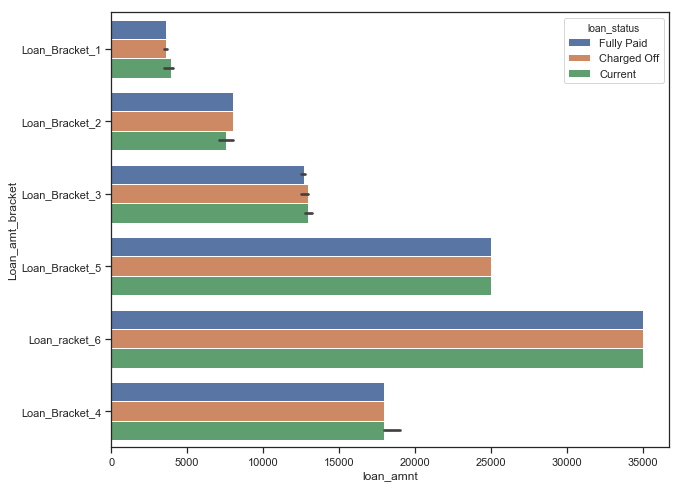

In [64]:
plt.figure(figsize=(10, 8))
sns.barplot(x='loan_amnt', y="Loan_amt_bracket",hue="loan_status", data=loan, estimator=np.median)
plt.show()

Obeservation: Most loans of customers under loan bracket 6 show status as 'charged-off' / 'defaulters'

Followed by customers under loan bracket 5

### Bucketing the int rate 

We are segmenting the intrest rate column with if-else condition & lambda function

In [65]:
loan['int_rate']=loan['int_rate'].str.replace('%','',regex=True)

In [66]:
loan['int_rate']=loan['int_rate'].apply(pandas.to_numeric)

In [67]:
def Int_rate_bracket(x):
    'Dividing the Intrest rate into following categories'
    if x < 6:
        return "Int_Bracket_1"
    elif 6 <= x < 10:
        return "Int_Bracket_2"    
    elif 10 <= x < 14:
        return "Int_Bracket_3"    
    elif 14 <= x < 16:
        return "Int_Bracket_4"
    elif 16 <= x < 20:
        return "Int_Bracket_5"
    else:
        return "Int_racket_6"

In [68]:
loan['Int_amt_bracket'] = loan.int_rate.apply(lambda x: Int_rate_bracket(x))

In [69]:
loan.Int_amt_bracket.value_counts()

Int_Bracket_3    16296
Int_Bracket_2    10812
Int_Bracket_4     5315
Int_Bracket_5     5092
Int_Bracket_1     1330
Int_racket_6       872
Name: Int_amt_bracket, dtype: int64

Here we are trying to see the impact of Intrest rate segments on the distribution of loan amounts. 

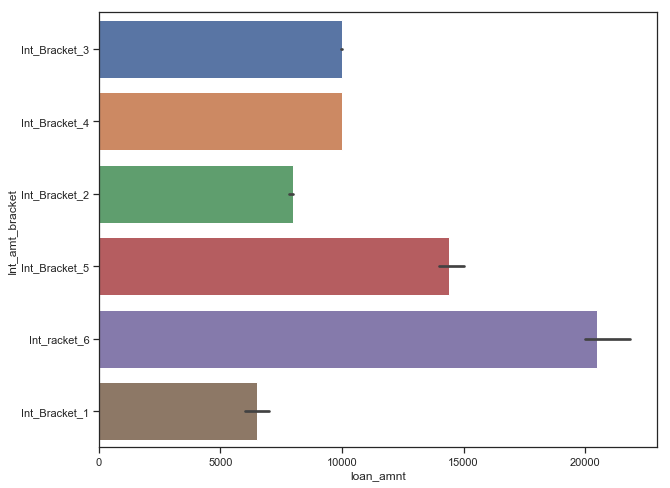

In [70]:
plt.figure(figsize=(10, 8))
sns.barplot(x='loan_amnt', y="Int_amt_bracket", data=loan, estimator=np.median)
plt.show()

Here we are trying to see the impact of Intrest rate segments on the distribution of loan amounts along with loan status.

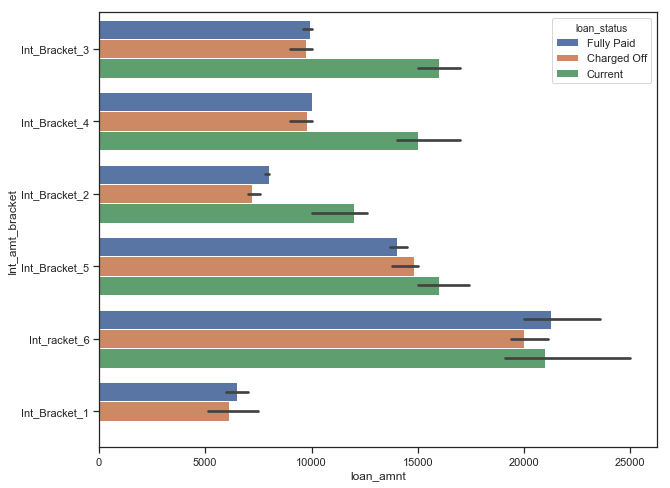

In [71]:
plt.figure(figsize=(10, 8))
sns.barplot(x='loan_amnt', y="Int_amt_bracket",hue="loan_status", data=loan, estimator=np.median)
plt.show()

Obeservation: Most loans of customers under Intrest rate bracket 6 show status as 'charged-off' / 'defaulters'

Followed by customers under intrest rate bracket 5

### Bucketing the installements

We are segmenting the installment column with if-else condition & lambda function

In [72]:
loan['installment']=loan['installment'].apply(pandas.to_numeric)

In [73]:
def Installament_bracket(x):
    'Dividing Intrest rate into following categories'
    if x < 100:
        return "Install_1"
    elif 100 <= x < 200:
        return "Install_2"    
    elif 200 <= x < 300:
        return "Install_3"    
    elif 300 <= x < 400:
        return "Install_4"
    elif 400 <= x < 500:
        return "Install_5"
    elif 500 <= x < 600:
        return "Install_6"    
    elif 600 <= x < 700:
        return "Install_7"    
    elif 700 <= x < 800:
        return "Install_8"
    elif 800 <= x < 900:
        return "Install_9"
    else:
        return "Install_10"

In [74]:
loan['Installament_bracket'] = loan.installment.apply(lambda x: Installament_bracket(x))

In [75]:
loan.Installament_bracket.value_counts()

Install_2     9249
Install_3     7814
Install_4     7357
Install_5     4125
Install_1     4032
Install_6     2750
Install_7     1893
Install_9     1074
Install_8      879
Install_10     544
Name: Installament_bracket, dtype: int64

Here we are trying to see the impact of installment segments on the distribution of loan amounts.

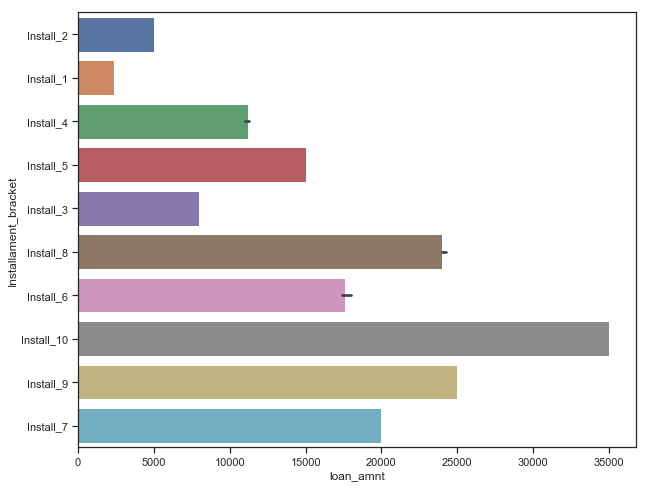

In [76]:
plt.figure(figsize=(10, 8))
sns.barplot(x='loan_amnt', y="Installament_bracket", data=loan, estimator=np.median)
plt.show()

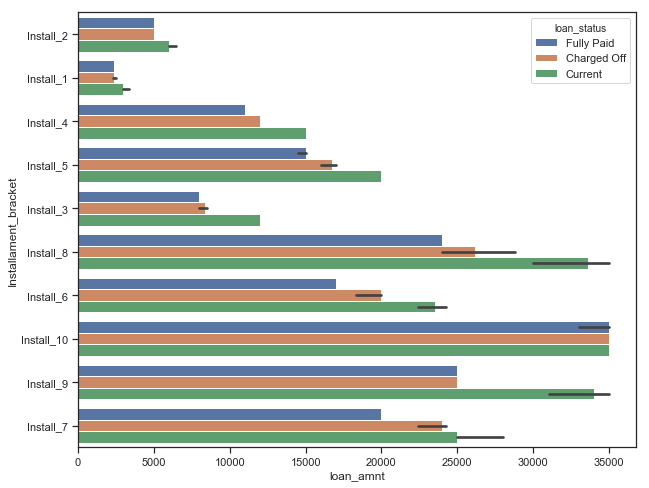

In [77]:
plt.figure(figsize=(10, 8))
sns.barplot(x='loan_amnt', y="Installament_bracket",hue="loan_status", data=loan, estimator=np.median)
plt.show()

In [78]:
loan.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,Annual_Sal,Loan_amt_bracket,Int_amt_bracket,Installament_bracket
0,1077501,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,...,INDIVIDUAL,0,0.0,0,0.0,0.0,Bracket_1,Loan_Bracket_1,Int_Bracket_3,Install_2
1,1077430,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,...,INDIVIDUAL,0,0.0,0,0.0,0.0,Bracket_1,Loan_Bracket_1,Int_Bracket_4,Install_1
2,1077175,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,...,INDIVIDUAL,0,0.0,0,0.0,0.0,Bracket_1,Loan_Bracket_1,Int_Bracket_4,Install_1
3,1076863,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,...,INDIVIDUAL,0,0.0,0,0.0,0.0,Bracket_1,Loan_Bracket_2,Int_Bracket_3,Install_4
4,1075358,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,...,INDIVIDUAL,0,0.0,0,0.0,0.0,Bracket_1,Loan_Bracket_1,Int_Bracket_3,Install_1


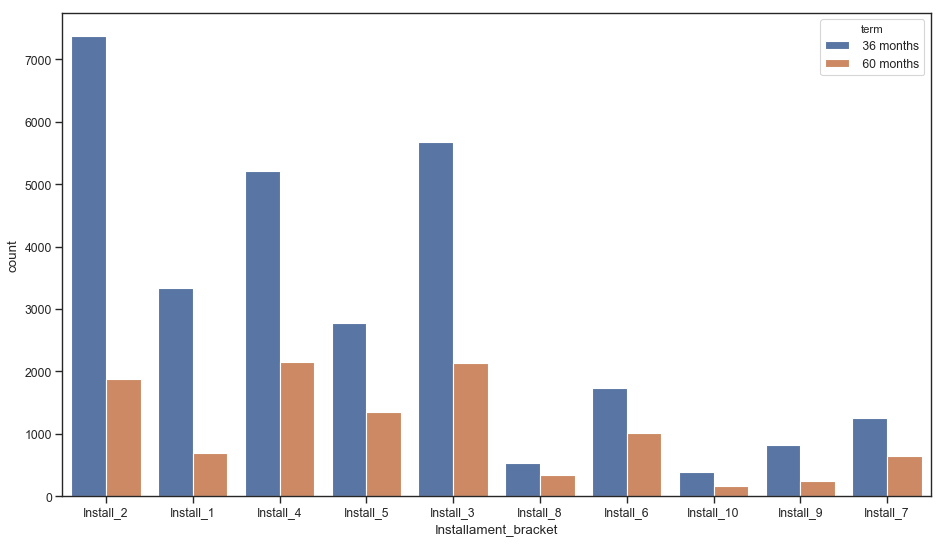

In [79]:
plt.figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
sns.countplot(x = "Installament_bracket", hue = "term", data = loan)

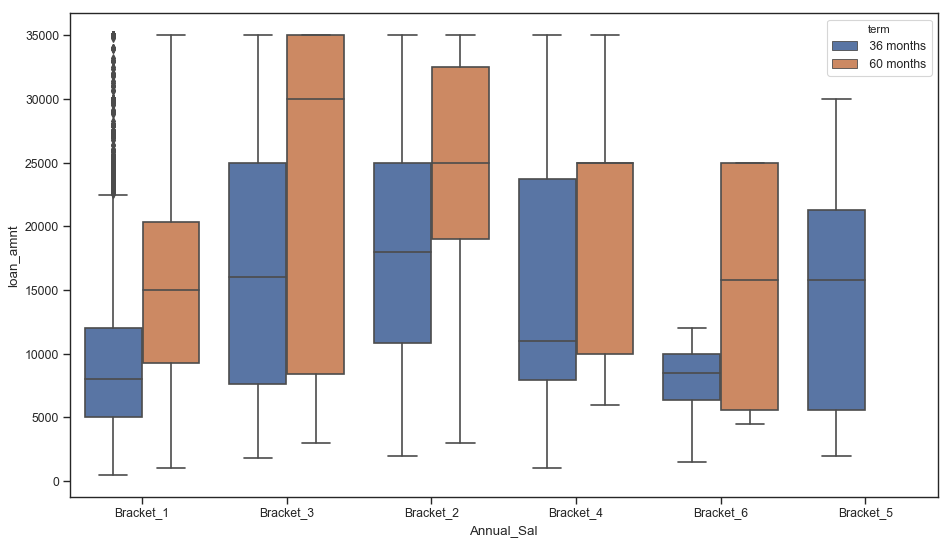

In [81]:

plt.figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
sns.boxplot(x='Annual_Sal', y='loan_amnt', hue='term', data=loan)
plt.show()

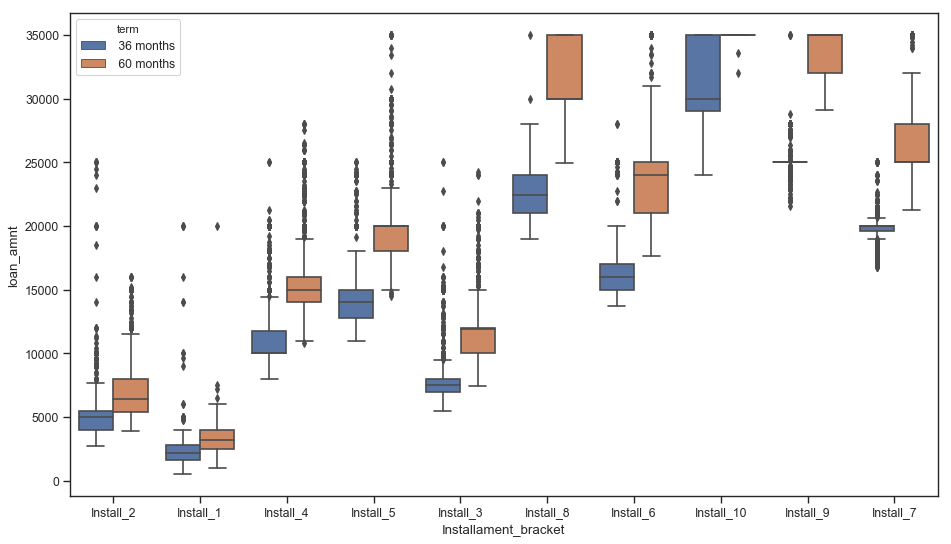

In [82]:
plt.figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
sns.boxplot(x='Installament_bracket', y='loan_amnt', hue='term', data=loan)
plt.show()

In [83]:
loan.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,Annual_Sal,Loan_amt_bracket,Int_amt_bracket,Installament_bracket
0,1077501,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,...,INDIVIDUAL,0,0.0,0,0.0,0.0,Bracket_1,Loan_Bracket_1,Int_Bracket_3,Install_2
1,1077430,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,...,INDIVIDUAL,0,0.0,0,0.0,0.0,Bracket_1,Loan_Bracket_1,Int_Bracket_4,Install_1
2,1077175,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,...,INDIVIDUAL,0,0.0,0,0.0,0.0,Bracket_1,Loan_Bracket_1,Int_Bracket_4,Install_1
3,1076863,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,...,INDIVIDUAL,0,0.0,0,0.0,0.0,Bracket_1,Loan_Bracket_2,Int_Bracket_3,Install_4
4,1075358,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,...,INDIVIDUAL,0,0.0,0,0.0,0.0,Bracket_1,Loan_Bracket_1,Int_Bracket_3,Install_1


Here we are trying to see the impact of term segments on the distribution of loan bracket segment.
Groupby fuction is being used here.

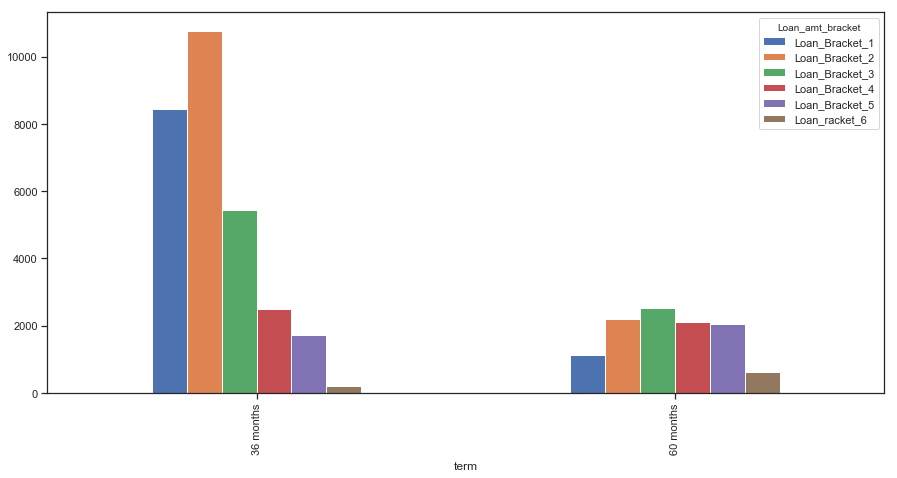

In [84]:
# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
loan.groupby(['term','Loan_amt_bracket']).count()['Annual_Sal'].unstack().plot(ax=ax,kind='bar')

Here we are trying to see the impact of term segments on the distribution of installment bracket segment.
Groupby fuction is being used here.

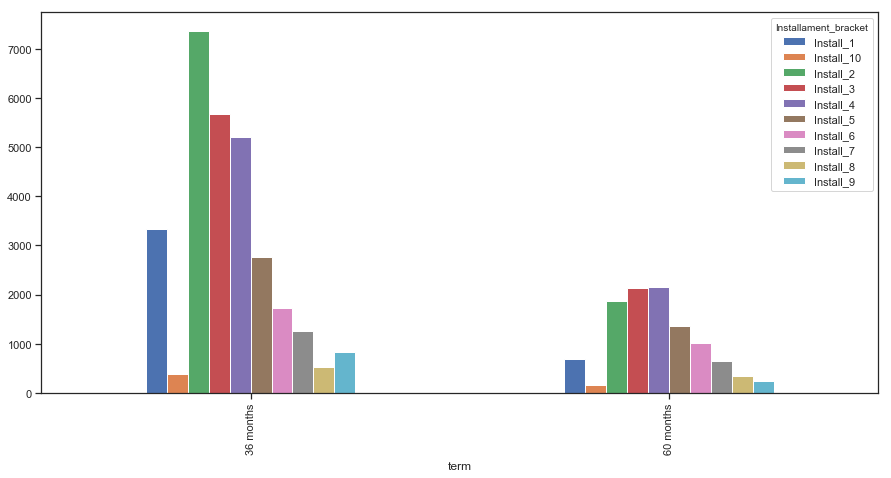

In [85]:
# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
loan.groupby(['term','Installament_bracket']).count()['Annual_Sal'].unstack().plot(ax=ax,kind='bar')

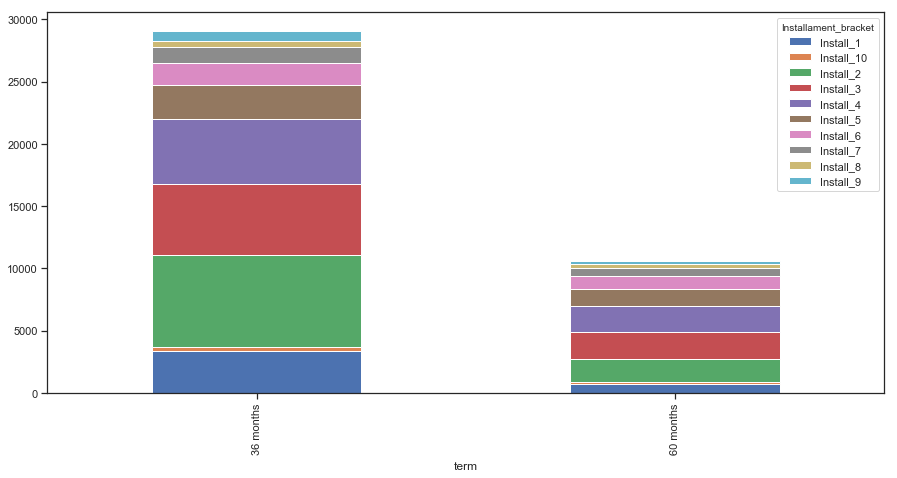

In [86]:
# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
loan.groupby(['term','Installament_bracket']).count()['Annual_Sal'].unstack().plot(ax=ax,kind='bar',stacked = True)

# Number of Public Bankruptcies

This is another variable of interest. Common sense tells us that there is a relationship between defaulting and the number of bankruptcies. But, is this true for the given data? Time to find out...

In [88]:
# adding bankruptcies to the mix
loans_final["bankruptcies"] = loan["pub_rec_bankruptcies"]

In [89]:
# description of bankruptcies
loans_final["bankruptcies"].describe()

count    39020.000000
mean         0.043260
std          0.204324
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: bankruptcies, dtype: float64

In [90]:
# info about bankruptcies
loans_final["bankruptcies"].isnull().mean()

0.017549160309187503

Bankruptcies contains about 1.75% missing values. This is not much. Relative to the size of the data, we can impute them with the mode, (since this particular variable has only a few recurring values) or just drop them. Imputing seems to be a better option.

But, dealing with such a skewed distribution might not be for the best as the variable contains a lot of zeros. Converting it into a binary categorical variable might serve the purpose of this analysis better as:

1. Tests for association become easy
2. Treating the missing values becomes easy
3. Information can be packaged more effectively. 

Therefore, a new cateogorical variable describing if a person had a bankruptcy in the past will be used in lieu of the numeric variable.

In [91]:
# creating a new variable bankrupt_cat
loans_final["bankrupt_cat"] = "no"
loans_final.loc[loans_final.bankruptcies != 0, "bankrupt_cat"] = "yes"

# creating a new mask to filter out just the na values
mask = ~loans_final["bankruptcies"].isnull()

In [92]:
# pivot table of banruptcies and loan_status
bankruptcies_pt = loans_final.loc[mask, ["bankrupt_cat", "loan_status", "id"]].pivot_table("id", index = "bankrupt_cat", 
                                                                   columns = "loan_status", aggfunc = "count")

In [93]:
# getting the proportions instead of the counts
bankruptcies_props = bankruptcies_pt.reset_index().melt(id_vars = "bankrupt_cat")

Now that the observed frequencies are available in the form of a pivot table, a chi-square test for association can be carried out. The data does not violate any of the assumptions for the test and thus the results obtained can be trusted with a certain degree of confidence.

Before jumping to the test itself, the scipy.stats module needs to be imported to access the chisquare function. Also, defining a function to get the expected frequencies of the categories might help.

In [94]:
# function to get expected frequencies
def getExpFreqs(obs_freqs):
    exp_freqs = np.zeros(obs_freqs.shape)
    total = np.sum(obs_freqs)
    for i in range(obs_freqs.shape[0]):
        row_sum = obs_freqs[i, :].sum()
        for j in range(obs_freqs.shape[1]):
            col_sum = obs_freqs[:, j].sum()
            exp_freqs[i, j] = row_sum * col_sum / total
    return exp_freqs

In [95]:
# getting the result and storing it as a list
f_exp = getExpFreqs(np.array(bankruptcies_pt)).tolist()

# flattening the list
f_exp = [item for sublist in f_exp for item in sublist]

# getting the observed frequencies
f_obs = [item for sublist in np.array(bankruptcies_pt).tolist() for item in sublist]